# The Purpose Of this Experiment is to Loop Generator in Case 9 Bus IEEE by Matpower, *Simulation Use Optimal Alternating Current Power Flow (OPF) with default Newton Raphson Solver*.

In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Before Use Loop each Case Experiment will try to simulate and understand first what will be happen if change PMAX limit from generator and generator status.

# Base Case 9 Bus in MatpowerCaseFrames

In [43]:
from matpower import start_instance
from matpowercaseframes import CaseFrames

m = start_instance()

path = "../data/case9.m"
cf = CaseFrames(path)

In [44]:
cf.gen['PG']

1     72.3
2    163.0
3     85.0
Name: PG, dtype: float64

In [45]:
cf.gen['PMAX']

1    250.0
2    300.0
3    270.0
Name: PMAX, dtype: float64

In [46]:
cf.gen['PMIN']

1    10.0
2    10.0
3    10.0
Name: PMIN, dtype: float64

In [47]:
cf.gen['GEN_STATUS']

1    1.0
2    1.0
3    1.0
Name: GEN_STATUS, dtype: float64

In [48]:
import oct2py

import matpower

print(f"oct2py version: {oct2py.__version__}")
print(f"matpower version: {matpower.__version__}")

oct2py version: 5.8.0
matpower version: 8.0.0.2.2.2


# Case 1: Experiment Change PMAX in Gen 1,2, and 3.

### 1.1 Change PMAX Gen 1

In [49]:
# Base Case Running Simulation

from matpower import start_instance

m = start_instance()

m.eval(
    """
    mpopt = mpoption('verbose', 2);
    mpc = loadcase('case9');
    _r1 = runopf(mpc, mpopt);
    """
)

# fech data to python (.eval is used because .pull is not working in acessing field)
r1_mpc = m.eval(
    "struct("
    " 'baseMVA', _r1.baseMVA, 'version', _r1.version, 'bus', _r1.bus, 'gen', _r1.gen,"
    " 'branch', _r1.branch, 'gencost', _r1.gencost);"
)


MATPOWER Version 8.0, 17-May-2024
Optimal Power Flow -- AC-polar-power formulation
MATPOWER Interior Point Solver -- MIPS, Version 1.5.1, 10-May-2024
 (using built-in linear solver)
 it    objective   step size   feascond     gradcond     compcond     costcond
----  ------------ --------- ------------ ------------ ------------ ------------
  0      8363.125                   0.155       0.1765      57.1483            0
  1     5307.5519    0.68632   0.00900309      8.30505      15.6381     0.166397
  2     5391.0949    0.24288  0.000359195     0.630698      2.20652   0.00545763
  3     5352.5722   0.088637   3.7341e-05     0.141404     0.216699   0.00250292
  4     5315.4636    0.17189  0.000106315    0.0190754      0.02128    0.0024171
  5     5312.3257   0.066353  0.000123278   0.00135236   0.00351135  0.000204886
  6     5301.3809    0.19111   0.00120494   0.00174642  0.000962847  0.000714764
  7     5296.7947    0.11693  0.000322236  7.55989e-05  0.000161495  0.000299729
  8     5

### Modify PMAX Gen 1

In [50]:
[GEN_BUS, PG, QG, QMAX, QMIN, VG, MBASE, GEN_STATUS, PMAX, PMIN, 
 MU_PMAX, MU_PMIN, MU_QMAX, MU_QMIN, PC1, PC2, QC1MIN, QC1MAX, 
 QC2MIN, QC2MAX, RAMP_AGC, RAMP_10, RAMP_30, RAMP_Q, APF] = m.idx_gen(nout='max_nout')

gen_index = 1
gen_index_ = int(gen_index - 1)
gen_index_

0

In [51]:
PMAX_ = int(PMAX -1) 
r1_mpc['gen'][gen_index_,PMAX_] = 80

In [52]:
#Check the PMAX of generators, generator 1 must be turn 80 change from 250
print(r1_mpc['gen'][:, PMAX_])

[ 80. 300. 270.]


In [53]:

def runopf(mpc, m=None, verbose=False, inplace=True):
    if m is None:
        m = start_instance()
        SHUTDOWN = True
    else:
        SHUTDOWN = False

    # push value to octave client
    m.push('_mpc', r1_mpc)

    m.eval("_mpopt = mpoption('verbose', 2);", verbose=verbose)
    m.eval("_r1 = runopf(_mpc, _mpopt);", verbose=verbose)

    # fech data to python (.eval is used because .pull is not working in acessing field)
    if not inplace:
        mpc = {}

    _extract_result(mpc, m, verbose=verbose)

    if SHUTDOWN:
        m.exit()

    return mpc

def _extract_result(mpc, m, verbose=False):
    mpc['baseMVA'] = m.eval('_r1.baseMVA;', verbose=verbose)
    mpc['version'] = m.eval('_r1.version;', verbose=verbose)
    mpc['bus'] = m.eval('_r1.bus;', verbose=verbose)
    mpc['gen'] = m.eval('_r1.gen;', verbose=verbose)
    mpc['branch'] = m.eval('_r1.branch;', verbose=verbose)
    mpc['gencost'] = m.eval('_r1.gencost;', verbose=verbose)

In [54]:
mpc = cf.to_dict()
mpc = runopf(mpc, m=m, verbose=True, inplace=True) 


MATPOWER Version 8.0, 17-May-2024
Optimal Power Flow -- AC-polar-power formulation
MATPOWER Interior Point Solver -- MIPS, Version 1.5.1, 10-May-2024
 (using built-in linear solver)
 it    objective   step size   feascond     gradcond     compcond     costcond
----  ------------ --------- ------------ ------------ ------------ ------------
  0      6301.875                   0.155       0.1765      56.9914            0
  1     5330.3993    0.71703    0.0197894      8.27184      15.9704    0.0595929
  2     5381.7171    0.27876   0.00169491      1.16061      2.73219   0.00334746
  3     5371.0361   0.062848  1.50564e-05    0.0779506     0.273864  0.000694392
  4     5345.6271    0.11589  4.40316e-05    0.0184861     0.027073   0.00165305
  5     5331.9611   0.074998  4.39397e-05  0.000524819   0.00350408  0.000890548
  6     5317.4178    0.17942  0.000998394   0.00151594   0.00088331  0.000948561
  7     5313.1759    0.09853  0.000276583  0.000448685  0.000143261  0.000276927
  8     5

In [55]:
# Results from mpc last simulation putback to caseframes
cf = CaseFrames(mpc)
cf.attributes

['version', 'baseMVA', 'bus', 'gen', 'branch', 'gencost']

In [56]:
cf.gen['PG']

1     79.999972
2    140.282674
3     98.332289
Name: PG, dtype: float64

In [57]:
cf.gen['PMAX']

1     80.0
2    300.0
3    270.0
Name: PMAX, dtype: float64

When we change PMAX in gen 1 the Power Generated from Generator not violate PMAX limit.

### 1.2 Change PMAX Gen 2

In [58]:
# Revert back to original PMAX from base ieee case 9 
PMAX_ = int(PMAX - 1) 
r1_mpc['gen'][gen_index_,PMAX_] = 250

In [59]:
#Check the PMAX
print(r1_mpc['gen'][:, PMAX_])

[250. 300. 270.]


### Modify PMAX Gen 2

In [60]:
[GEN_BUS, PG, QG, QMAX, QMIN, VG, MBASE, GEN_STATUS, PMAX, PMIN, 
 MU_PMAX, MU_PMIN, MU_QMAX, MU_QMIN, PC1, PC2, QC1MIN, QC1MAX, 
 QC2MIN, QC2MAX, RAMP_AGC, RAMP_10, RAMP_30, RAMP_Q, APF] = m.idx_gen(nout='max_nout')

gen_index = 2
gen_index_ = int(gen_index - 1)
gen_index_

1

In [61]:
PMAX_ = int(PMAX - 1) 
r1_mpc['gen'][gen_index_,PMAX_] = 130

In [62]:
#Check the PMAX of generators, generator 2 must be turn 130 change from 300
print(r1_mpc['gen'][:, PMAX_])

[250. 130. 270.]


In [63]:
mpc = cf.to_dict()
mpc = runopf(mpc, m=m, verbose=True, inplace=True) 


MATPOWER Version 8.0, 17-May-2024
Optimal Power Flow -- AC-polar-power formulation
MATPOWER Interior Point Solver -- MIPS, Version 1.5.1, 10-May-2024
 (using built-in linear solver)
 it    objective   step size   feascond     gradcond     compcond     costcond
----  ------------ --------- ------------ ------------ ------------ ------------
  0        6635.5                    0.14       0.1765      60.3451            0
  1     5400.6343     0.5349   0.00901433      8.16634       15.646    0.0742308
  2     5496.9423    0.24143  0.000388301      0.66258      2.21589   0.00625351
  3      5451.706   0.063535  2.87913e-05    0.0816629     0.227986   0.00291905
  4     5352.6774    0.18548  0.000128936    0.0160398    0.0253563   0.00640891
  5     5324.3727    0.10677  0.000194664   0.00160231    0.0041628   0.00184363
  6     5306.8788    0.19536   0.00123159   0.00147643   0.00112797   0.00114157
  7     5300.2308    0.11784  0.000322498  0.000110269  0.000209085  0.000434315
  8     5

In [64]:
# Results from mpc last simulation putback to caseframes
cf = CaseFrames(mpc)
cf.attributes

['version', 'baseMVA', 'bus', 'gen', 'branch', 'gencost']

In [65]:
cf.gen['PG']

1     92.045052
2    129.999941
3     96.193285
Name: PG, dtype: float64

In [66]:
cf.gen['PMAX']

1    250.0
2    130.0
3    270.0
Name: PMAX, dtype: float64

In [67]:
cf.gen['QG']

1    12.822636
2    -0.318900
3   -22.652973
Name: QG, dtype: float64

In [68]:
cf.gen['QMAX']

1    300.0
2    300.0
3    300.0
Name: QMAX, dtype: float64

When we change PMAX in gen 2 the Power Generated from Generator not violate PMAX limit.

### 1.3 Change PMAX Gen 3

In [69]:
# Revert back to original PMAX from base ieee case 9 
PMAX_ = int(PMAX - 1) 
r1_mpc['gen'][gen_index_,PMAX_] = 300
print(r1_mpc['gen'][:, PMAX_])

[250. 300. 270.]


### Modify PMAX Gen 3

In [70]:
[GEN_BUS, PG, QG, QMAX, QMIN, VG, MBASE, GEN_STATUS, PMAX, PMIN, 
 MU_PMAX, MU_PMIN, MU_QMAX, MU_QMIN, PC1, PC2, QC1MIN, QC1MAX, 
 QC2MIN, QC2MAX, RAMP_AGC, RAMP_10, RAMP_30, RAMP_Q, APF] = m.idx_gen(nout='max_nout')

gen_index = 3
gen_index_ = int(gen_index - 1)
gen_index_

2

In [71]:
#Check the PMAX of generators, generator 3 must be turn 90 change from 270
PMAX_ = int(PMAX - 1) 
r1_mpc['gen'][gen_index_,PMAX_] = 90
print(r1_mpc['gen'][:, PMAX_])

[250. 300.  90.]


In [72]:
mpc = cf.to_dict()
mpc = runopf(mpc, m=m, verbose=True, inplace=True) 


MATPOWER Version 8.0, 17-May-2024
Optimal Power Flow -- AC-polar-power formulation
MATPOWER Interior Point Solver -- MIPS, Version 1.5.1, 10-May-2024
 (using built-in linear solver)
 it    objective   step size   feascond     gradcond     compcond     costcond
----  ------------ --------- ------------ ------------ ------------ ------------
  0      6178.375                   0.155        0.168       56.913            0
  1     5305.3133    0.63805   0.00882854      7.82508      14.8633    0.0539647
  2     5400.7028    0.25096  0.000358474     0.675274      2.07273   0.00623244
  3     5371.9873   0.091967  3.45408e-05     0.160527     0.203864   0.00186455
  4     5328.8144    0.17504   0.00011159     0.017654    0.0204149   0.00280855
  5     5318.7006   0.074081   0.00017623  0.000950314   0.00348923  0.000659788
  6     5305.2073    0.19261   0.00120933   0.00180076  0.000959908  0.000880842
  7     5299.9666    0.11482  0.000298946   6.5489e-05  0.000156733  0.000342411
  8     5

In [73]:
# Results from mpc last simulation putback to caseframes
cf = CaseFrames(mpc)
cf.attributes

['version', 'baseMVA', 'bus', 'gen', 'branch', 'gencost']

In [74]:
cf.gen['PG']

1     91.612175
2    136.649860
3     89.999958
Name: PG, dtype: float64

In [75]:
cf.gen['PMAX']

1    250.0
2    300.0
3     90.0
Name: PMAX, dtype: float64

# Case 2: Loop Change PMAX With Requirement "Results From OPF Must Not Violate PMAX"

In [76]:
#  BUS_TYPE    bus type (1 = PQ, 2 = PV, 3 = ref, 4 = isolated)
cf.bus

,BUS_I,BUS_TYPE,PD,QD,GS,BS,BUS_AREA,VM,VA,BASE_KV,ZONE,VMAX,VMIN,LAM_P,LAM_Q,MU_VMAX,MU_VMIN
1,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.099976,0.000000,345.0,1.0,1.1,0.9,25.154678,1.865524e-08,10.066032,0.0
2,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.097317,4.897677,345.0,1.0,1.1,0.9,24.430476,-6.382718e-10,0.000000,0.0
3,3.0,2.0,0.0,0.0,0.0,0.0,1.0,1.086717,2.860363,345.0,1.0,1.1,0.9,24.497878,-3.142275e-08,0.000000,0.0
4,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1.094325,-2.512511,345.0,1.0,1.1,0.9,25.154911,5.293036e-03,0.000000,0.0
5,5.0,1.0,90.0,30.0,0.0,0.0,1.0,1.084613,-4.108541,345.0,1.0,1.1,0.9,25.411456,2.677463e-02,0.000000,0.0
6,6.0,1.0,0.0,0.0,0.0,0.0,1.0,1.099999,0.331678,345.0,1.0,1.1,0.9,24.497878,2.102417e-06,70.705653,0.0
7,7.0,1.0,100.0,35.0,0.0,0.0,1.0,1.089482,-1.347442,345.0,1.0,1.1,0.9,24.664133,3.621717e-02,0.000000,0.0
8,8.0,1.0,0.0,0.0,0.0,0.0,1.0,1.099999,0.840254,345.0,1.0,1.1,0.9,24.430478,1.093410e-05,81.033480,0.0
9,9.0,1.0,125.0,50.0,0.0,0.0,1.0,1.071837,-4.669947,345.0,1.0,1.1,0.9,25.404186,1.137927e-01,0.000000,0.0


In [77]:
cf.gencost

,MODEL,STARTUP,SHUTDOWN,NCOST,COST_2,COST_1,COST_0
1,2.0,1500.0,0.0,3.0,0.1100,5.0,150.0
2,2.0,2000.0,0.0,3.0,0.0850,1.2,600.0
3,2.0,3000.0,0.0,3.0,0.1225,1.0,335.0


## Plot Curve Incremental Cost From *cf.gencost*

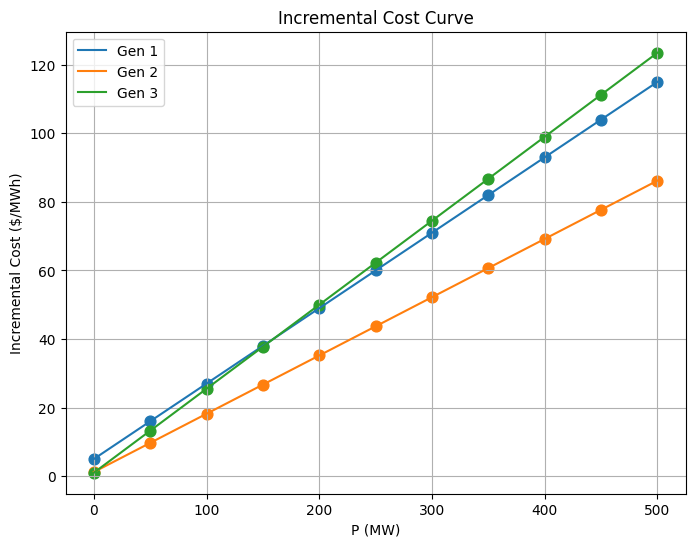

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Data gencost (c2, c1, c0) for every generator
gencost = [
    (0.1100, 5.0, 150.0),   # Gen 1
    (0.0850, 1.2, 600.0),   # Gen 2
    (0.1225, 1.0, 335.0)    # Gen 3
]

#  range of P (MW)
P = np.linspace(0, 500, 500)

# Points per 50 MW
P_points = np.arange(0, 501, 50)

plt.figure(figsize=(8,6))

# Plot incremental cost for every of generator
for i, (c2, c1, c0) in enumerate(gencost, start=1):
    IC = 2*c2*P + c1   # Incremental cost function
    IC_points = 2*c2*P_points + c1
    plt.plot(P, IC, label=f'Gen {i}')
    plt.scatter(P_points, IC_points, marker='o', s=60)

plt.xlabel('P (MW)')
plt.ylabel('Incremental Cost ($/MWh)')
plt.title('Incremental Cost Curve')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
P_points

array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

In [78]:
# Revert back to original PMAX from base ieee case 9 
PMAX_ = int(PMAX - 1) 
r1_mpc['gen'][gen_index_,PMAX_] = 270
print(r1_mpc['gen'][:, PMAX_])

[250. 300. 270.]


based on curve, gen 2 is the most cheapest better than gen 1 and 3, gen 3 is the most expensive and gen 1 is cheaper number 2. 

## Loop PMAX, Define First What PMAX Used

In [125]:
# Looping PMAX, Must Define first what numbers that will be use in loop change
# Target list change of PMAX for every generator
# format: {index_python: new_PMAX_values}

# PMAX target values for each of generators
# new_pmax_values = [300, 500, 200]   # gen1, gen2, gen3
new_pmax_values = [100, 135, 95]   # gen1, gen2, gen3


# loop untuk overwrite PMAX tiap generator
for gen_index, new_pmax in enumerate(new_pmax_values):
    r1_mpc['gen'][gen_index, PMAX_] = new_pmax

# cek hasil PMAX setelah diubah
print("PMAX after update:")
print(r1_mpc['gen'][:, PMAX_])

# run OPF
mpc = runopf(r1_mpc, m=m, verbose=True, inplace=True)

# Take PG Results after Run
PG_ = int(PG - 1)
PG_after = mpc['gen'][:, PG_]
PG_after

PMAX_ = int(PMAX - 1)
PMAX_after = mpc['gen'][:,PMAX_]
PMAX_after

print("PG:", PG_after)
print("PMAX:", PMAX_after)

# Checking if There is PG > PMAX
for i, (pg, pmax) in enumerate(zip(PG_after, PMAX_after)):
    if pg > pmax:
        print(f" Gen {i+1} violate PMAX: PG={pg:.2f}, PMAX={pmax:.2f}")
    else:
        print(f" For Generator {i+1} there is no violation PG > PMAX")


PMAX after update:
[100. 135.  95.]

MATPOWER Version 8.0, 17-May-2024
Optimal Power Flow -- AC-polar-power formulation
MATPOWER Interior Point Solver -- MIPS, Version 1.5.1, 10-May-2024
 (using built-in linear solver)
 it    objective   step size   feascond     gradcond     compcond     costcond
----  ------------ --------- ------------ ------------ ------------ ------------
  0     2616.6719                   0.125    0.0859225      71.9141            0
  1     5122.5943    0.81536     0.014827       6.9183      15.6424      0.19862
  2     5319.7486    0.34074   0.00142444      1.28738       3.4547    0.0130371
  3     5321.1752   0.018088  3.47845e-06    0.0258849     0.352711  9.31226e-05
  4     5320.5271     0.0182  3.86139e-06   0.00230747    0.0351949  4.23048e-05
  5     5316.6764   0.046519  5.48138e-05  0.000634057    0.0084716  0.000251339
  6     5307.9196   0.099513  0.000385072  0.000828491    0.0020215   0.00057172
  7     5298.3462    0.17271  0.000881529  0.000350365

# Case 3: Experiment Change Genstatus of slack and Gen 3

In [162]:
# PMAX change to default 9 bus IEEE case
r1_mpc['gen'][0:3, PMAX_] = [250, 300, 270]

print("PMAX default IEEE 9 bus:")
print(r1_mpc['gen'][:, PMAX_])

PMAX default IEEE 9 bus:
[250. 300. 270.]


## 3.1 Change Gen_Status Gen 1 (Slack)

In [145]:
[GEN_BUS, PG, QG, QMAX, QMIN, VG, MBASE, GEN_STATUS, PMAX, PMIN, 
 MU_PMAX, MU_PMIN, MU_QMAX, MU_QMIN, PC1, PC2, QC1MIN, QC1MAX, 
 QC2MIN, QC2MAX, RAMP_AGC, RAMP_10, RAMP_30, RAMP_Q, APF] = m.idx_gen(nout='max_nout')

gen_index = 1
gen_index_ = int(gen_index - 1)
gen_index_

GEN_STATUS_ = int(GEN_STATUS - 1) # -1 due to python indexing start from 0
r1_mpc['gen'][gen_index_,GEN_STATUS_] = 0

In [146]:
print(r1_mpc['gen'][:, GEN_STATUS_])

[0. 1. 1.]


In [147]:
# run OPF
mpc = runopf(r1_mpc, m=m, verbose=True, inplace=True)


MATPOWER Version 8.0, 17-May-2024
Optimal Power Flow -- AC-polar-power formulation
MATPOWER Interior Point Solver -- MIPS, Version 1.5.1, 10-May-2024
 (using built-in linear solver)
 it    objective   step size   feascond     gradcond     compcond     costcond
----  ------------ --------- ------------ ------------ ------------ ------------
  0      5704.125                   0.155       0.1765      53.8542            0
  1     6379.9437    0.51944    0.0190183      7.54382      11.1958    0.0430345
  2     6680.7822    0.54053   0.00200334      1.26812      2.41936    0.0183663
  3     6660.4399   0.038847  1.66416e-05    0.0880329     0.252644   0.00121951
  4     6591.9254    0.17745  0.000132943    0.0518963    0.0257388   0.00411241
  5     6568.0996    0.12454  0.000320356    0.0136191   0.00801624   0.00143599
  6     6540.1936    0.17259  0.000745848   0.00231882   0.00164638   0.00168432
  7      6532.962   0.099403  0.000232506   0.00100447   0.00032516  0.000437213
  8      

## 3.2 Change Gen_Status Gen 3 (PV)

In [148]:
[GEN_BUS, PG, QG, QMAX, QMIN, VG, MBASE, GEN_STATUS, PMAX, PMIN, 
 MU_PMAX, MU_PMIN, MU_QMAX, MU_QMIN, PC1, PC2, QC1MIN, QC1MAX, 
 QC2MIN, QC2MAX, RAMP_AGC, RAMP_10, RAMP_30, RAMP_Q, APF] = m.idx_gen(nout='max_nout')

gen_index = 1
gen_index_ = int(gen_index - 1)
gen_index_

GEN_STATUS_ = int(GEN_STATUS - 1) # -1 due to python indexing start from 0
r1_mpc['gen'][gen_index_,GEN_STATUS_] = 1

print(r1_mpc['gen'][:, GEN_STATUS_])

[1. 1. 1.]


In [149]:
[GEN_BUS, PG, QG, QMAX, QMIN, VG, MBASE, GEN_STATUS, PMAX, PMIN, 
 MU_PMAX, MU_PMIN, MU_QMAX, MU_QMIN, PC1, PC2, QC1MIN, QC1MAX, 
 QC2MIN, QC2MAX, RAMP_AGC, RAMP_10, RAMP_30, RAMP_Q, APF] = m.idx_gen(nout='max_nout')

gen_index = 3
gen_index_ = int(gen_index - 1)
gen_index_

GEN_STATUS_ = int(GEN_STATUS - 1) # -1 due to python indexing start from 0
r1_mpc['gen'][gen_index_,GEN_STATUS_] = 0

print(r1_mpc['gen'][:, GEN_STATUS_])

[1. 1. 0.]


In [150]:
# run OPF
mpc = runopf(r1_mpc, m=m, verbose=True, inplace=True)


MATPOWER Version 8.0, 17-May-2024
Optimal Power Flow -- AC-polar-power formulation
MATPOWER Interior Point Solver -- MIPS, Version 1.5.1, 10-May-2024
 (using built-in linear solver)
 it    objective   step size   feascond     gradcond     compcond     costcond
----  ------------ --------- ------------ ------------ ------------ ------------
  0      5487.125                   0.155        0.168      53.7758            0
  1     6522.8476    0.46174    0.0143286      6.97721      11.1999    0.0668764
  2     6663.6671    0.38256  0.000793444      1.00207      1.90817   0.00852272
  3      6624.637   0.065433  5.76949e-05     0.168241     0.197198   0.00234223
  4     6540.2412    0.23304  0.000159064    0.0402933    0.0204507   0.00507655
  5     6532.2732   0.093702  0.000245971   0.00538465   0.00399906  0.000481737
  6     6517.0061    0.21741   0.00122059   0.00208918   0.00101133  0.000923469
  7     6510.9013    0.13828  0.000453725  0.000215328  0.000220495  0.000369609
  8     6

In [155]:
[GEN_BUS, PG, QG, QMAX, QMIN, VG, MBASE, GEN_STATUS, PMAX, PMIN, 
 MU_PMAX, MU_PMIN, MU_QMAX, MU_QMIN, PC1, PC2, QC1MIN, QC1MAX, 
 QC2MIN, QC2MAX, RAMP_AGC, RAMP_10, RAMP_30, RAMP_Q, APF] = m.idx_gen(nout='max_nout')

gen_index = 2
gen_index_ = int(gen_index - 1)
gen_index_

GEN_STATUS_ = int(GEN_STATUS - 1) # -1 due to python indexing start from 0
r1_mpc['gen'][gen_index_,GEN_STATUS_] = 1

print(r1_mpc['gen'][:, GEN_STATUS_])

[1. 1. 1.]


# Case 4: Loop Change Gen_Status 

In [158]:
# Looping PMAX, Must Define first what numbers that will be use in loop change
# Target list change of PMAX for every generator
# format: {index_python: new_PMAX_values}

# PMAX target values for each of generators
new_GenStatus_values = [1, 1, 0]   # gen1, gen2, gen3


# loop untuk overwrite PMAX tiap generator
for gen_index, new_GenStatus_values in enumerate(new_GenStatus_values):
    r1_mpc['gen'][gen_index, GEN_STATUS_] = new_GenStatus_values

# cek hasil PMAX setelah diubah
print("Gen_Status after update:")
print(r1_mpc['gen'][:, GEN_STATUS_])

# run OPF
mpc = runopf(r1_mpc, m=m, verbose=True, inplace=True)

# # Take PG Results after Run
# PG_ = int(PG - 1)
# PG_after = mpc['gen'][:, PG_]
# PG_after

# PMAX_ = int(PMAX - 1)
# PMAX_after = mpc['gen'][:,PMAX_]
# PMAX_after

# print("PG:", PG_after)
# print("PMAX:", PMAX_after)

# # Checking if There is PG > PMAX
# for i, (pg, pmax) in enumerate(zip(PG_after, PMAX_after)):
#     if pg > pmax:
#         print(f" Gen {i+1} violate PMAX: PG={pg:.2f}, PMAX={pmax:.2f}")
#     else:
#         print(f" For Generator {i+1} there is no violation PG > PMAX")

Gen_Status after update:
[1. 1. 0.]

MATPOWER Version 8.0, 17-May-2024
Optimal Power Flow -- AC-polar-power formulation
MATPOWER Interior Point Solver -- MIPS, Version 1.5.1, 10-May-2024
 (using built-in linear solver)
 it    objective   step size   feascond     gradcond     compcond     costcond
----  ------------ --------- ------------ ------------ ------------ ------------
  0      5487.125                   0.155        0.168      53.7758            0
  1     6522.8476    0.46174    0.0143286      6.97721      11.1999    0.0668764
  2     6663.6671    0.38256  0.000793444      1.00207      1.90817   0.00852272
  3      6624.637   0.065433  5.76949e-05     0.168241     0.197198   0.00234223
  4     6540.2412    0.23304  0.000159064    0.0402933    0.0204507   0.00507655
  5     6532.2732   0.093702  0.000245971   0.00538465   0.00399906  0.000481737
  6     6517.0061    0.21741   0.00122059   0.00208918   0.00101133  0.000923469
  7     6510.9013    0.13828  0.000453725  0.000215328

# Looping PMAX but skip one or Some Generators

In [164]:
# target PMAX values
new_pmax_values = [350, 80, 100]

# Combination example: If want to skip some generator
for idx, val in enumerate(new_pmax_values):
    if idx != 1:  # Example: skip gen 2
        r1_mpc['gen'][idx, PMAX_] = val

# cek results
print(r1_mpc['gen'][:, PMAX_])


[350. 300. 100.]
